Q2(a) Bond price: 98.5


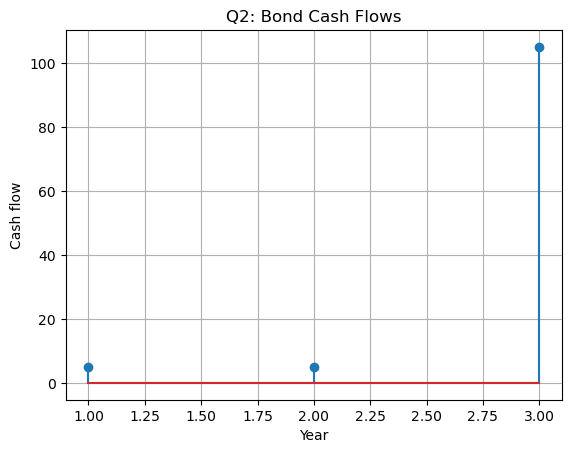

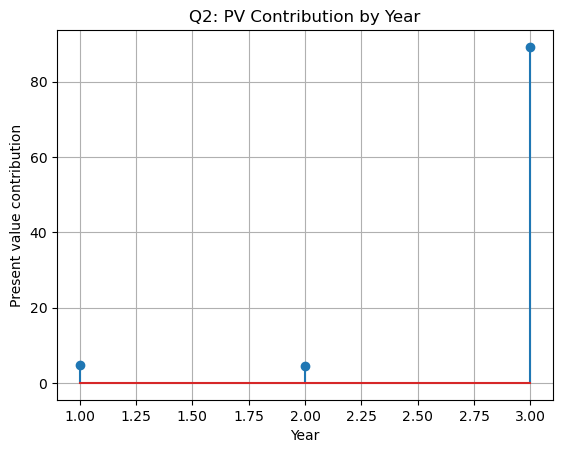

Q2(b) Fisher prices from spot: [np.float64(0.952381), np.float64(0.889996), np.float64(0.827849)]
Q2(b) Bond price: 96.136


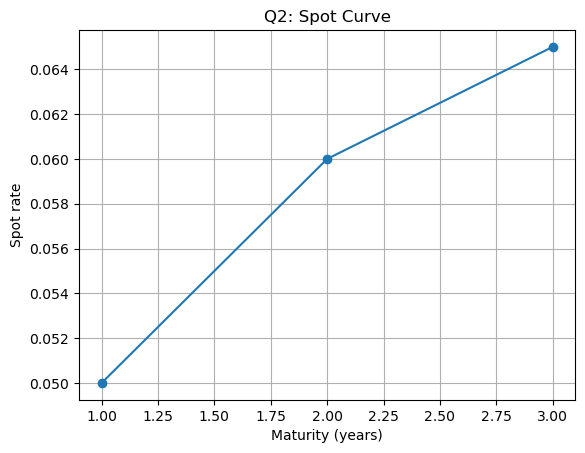

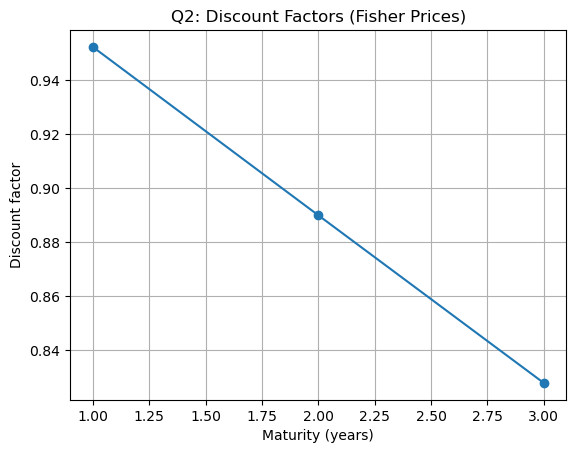

Q2(c) Bond price: 4380.0


In [1]:
### Niraj Neupane

## Financial Micro Economics

# ============================================================
# Q2 — Bond Pricing with Fisher Prices / Spot Rates + Plots
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Core functions
# ----------------------------
def fisher_prices_from_spot(spot_rates):
    """
    spot_rates: list of annual spot rates (decimals) [r1, r2, ..., rT]
    returns discount factors (Fisher prices) [1/(1+r1)^1, ..., 1/(1+rT)^T]
    """
    spot_rates = np.asarray(spot_rates, dtype=float)
    return np.array([1.0 / ((1.0 + r) ** (t + 1)) for t, r in enumerate(spot_rates)], dtype=float)

def price_coupon_bond(face_value, coupon, fisher_prices):
    """
    fisher_prices[t-1] is DF for year t
    cashflow_t = coupon (t<T), coupon+face (t=T)
    """
    dfs = np.asarray(fisher_prices, dtype=float)
    T = len(dfs)
    cfs = np.full(T, coupon, dtype=float)
    cfs[-1] += face_value
    return float(np.dot(dfs, cfs))

# ----------------------------
# 2) Example (a): price from Fisher prices (edit to match your question)
# ----------------------------
face, coupon = 100.0, 5.0
fisher = np.array([0.95, 0.90, 0.85])  # example DFs
price_a = price_coupon_bond(face, coupon, fisher)
print("Q2(a) Bond price:", round(price_a, 4))

# Plot: cashflows and PV contributions
T = len(fisher)
cfs = np.full(T, coupon); cfs[-1] += face
pv_contrib = fisher * cfs

plt.figure()
plt.stem(range(1, T+1), cfs)
plt.xlabel("Year")
plt.ylabel("Cash flow")
plt.title("Q2: Bond Cash Flows")
plt.grid(True)
plt.show()

plt.figure()
plt.stem(range(1, T+1), pv_contrib)
plt.xlabel("Year")
plt.ylabel("Present value contribution")
plt.title("Q2: PV Contribution by Year")
plt.grid(True)
plt.show()

# ----------------------------
# 3) Example (b): price from spot rates (edit to match your question)
# ----------------------------
spot = [0.05, 0.06, 0.065]  # example spot rates
fisher_b = fisher_prices_from_spot(spot)
price_b = price_coupon_bond(face, coupon, fisher_b)

print("Q2(b) Fisher prices from spot:", [round(x, 6) for x in fisher_b])
print("Q2(b) Bond price:", round(price_b, 4))

plt.figure()
plt.plot(range(1, len(spot)+1), spot, marker="o")
plt.xlabel("Maturity (years)")
plt.ylabel("Spot rate")
plt.title("Q2: Spot Curve")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(range(1, len(fisher_b)+1), fisher_b, marker="o")
plt.xlabel("Maturity (years)")
plt.ylabel("Discount factor")
plt.title("Q2: Discount Factors (Fisher Prices)")
plt.grid(True)
plt.show()

# ----------------------------
# 4) Example (c): your stated case: FV=300, coupon=10, fisher=[1..12]
# ----------------------------
face_c, coupon_c = 300.0, 10.0
fisher_c = np.arange(1, 13, dtype=float)  # [1,2,...,12]
price_c = price_coupon_bond(face_c, coupon_c, fisher_c)
print("Q2(c) Bond price:", round(price_c, 4))

# Suggestions (optional):
# - Add YTM solver (numerical) if the question asks yield given price
# - Add duration/convexity using PV weights if you want extra finance depth
